<a href="https://colab.research.google.com/github/navabro/IMDB-sentiment-analysis/blob/main/IMDb_Sentiment_Analysis_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb Sentiment Classification (Optimized)
This notebook trains and evaluates sentiment classification models on the IMDb dataset.

### Instructions
- Upload the `IMDB Dataset.csv` file when prompted.
- To keep training fast, we use a 10,000-sample subset of the dataset.
- Models: Logistic Regression, LinearSVC (fast SVM), Random Forest (reduced trees).


In [1]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving IMDB Dataset.csv to IMDB Dataset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Use smaller subset for faster training
df_small = df.sample(n=10000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(df_small['review'], df_small['sentiment'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       999
           1       0.86      0.90      0.88      1001

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



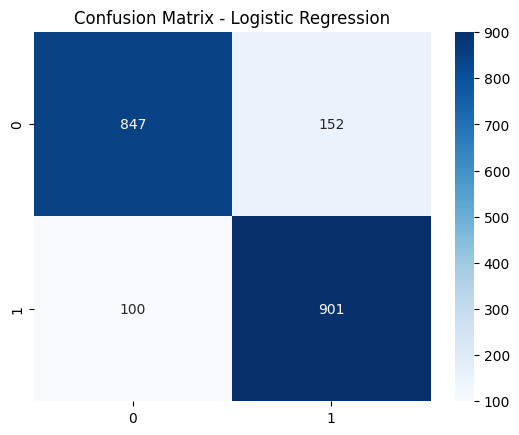


LinearSVC Results:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       999
           1       0.84      0.88      0.86      1001

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



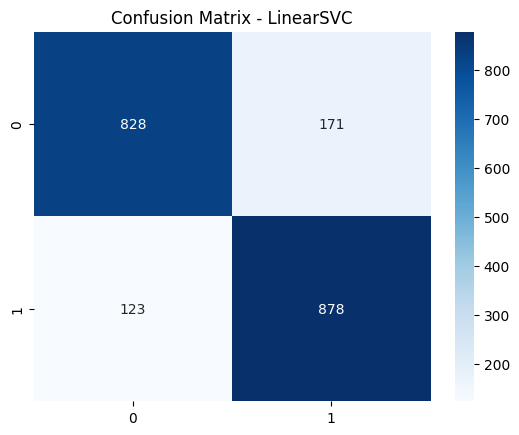


Random Forest Results:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       999
           1       0.84      0.82      0.83      1001

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



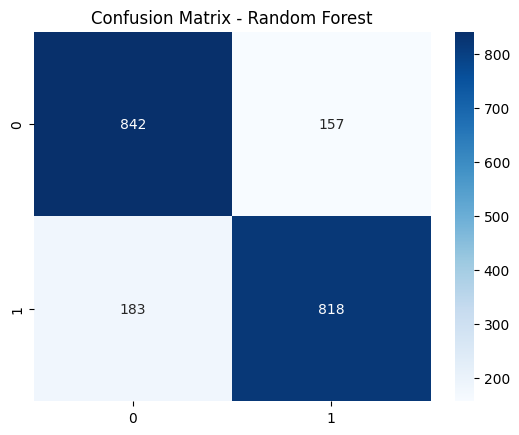

In [3]:
results = {}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1}
    print(f"\n{name} Results:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Logistic Regression
evaluate_model('Logistic Regression', LogisticRegression(max_iter=1000), X_train_vec, y_train, X_test_vec, y_test)

# LinearSVC (faster SVM)
evaluate_model('LinearSVC', LinearSVC(max_iter=2000), X_train_vec, y_train, X_test_vec, y_test)

# Random Forest (reduced trees)
evaluate_model('Random Forest', RandomForestClassifier(n_estimators=50), X_train_vec, y_train, X_test_vec, y_test)

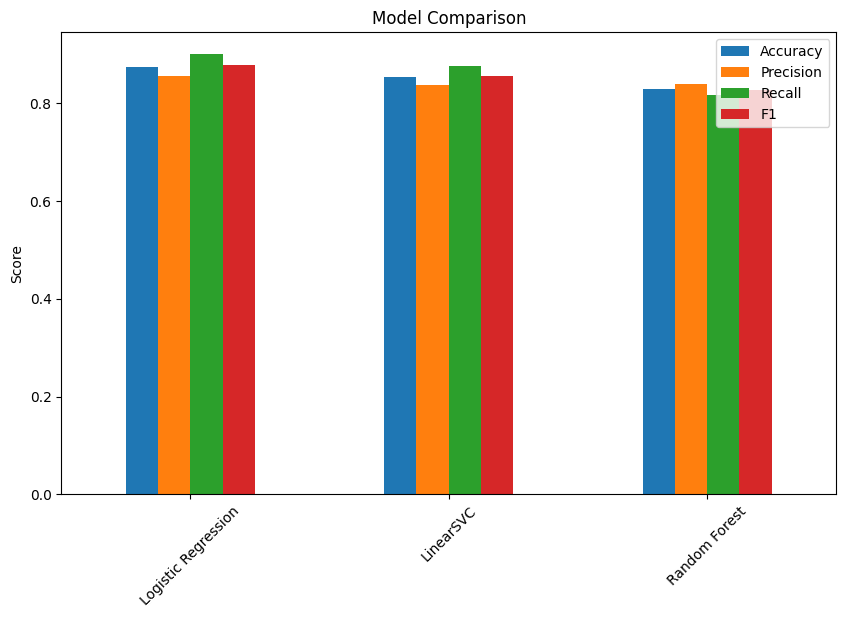

,Accuracy,Precision,Recall,F1
Logistic Regression,0.874,0.855651,0.900100,0.877313
LinearSVC,0.853,0.836988,0.877123,0.856585
Random Forest,0.830,0.838974,0.817183,0.827935


In [4]:
# Compare metrics
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

metrics_df